In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


In [35]:
import os

base_path = "Furniture"

folders = ["cabinets,cupboards,etc", "chair", "fridge", "table", "tv"]

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    if os.path.exists(folder_path):
        print(f"Accessing folder: {folder_path}")
        items = os.listdir(folder_path)
        print(f"Items in {folder}: {items}")
    else:
        print(f"Folder does not exist: {folder_path}")

Accessing folder: Furniture/cabinets,cupboards,etc
Items in cabinets,cupboards,etc: ['image_2341.jpeg', 'image_947.jpeg', 'image_1994.jpeg', 'image_2711.jpeg', 'image_1097.jpeg', 'image_414.jpeg', 'image_101.jpeg', 'image_1428.jpeg', 'image_551.jpeg', 'image_1582.jpeg', 'image_1078.jpeg', 'image_802.jpeg', 'image_2204.jpeg', 'image_2654.jpeg', 'image_2984.jpeg', 'image_678.jpeg', 'image_382.jpeg', 'image_1351.jpeg', 'image_228.jpeg', 'image_1701.jpeg', 'image_2087.jpeg', 'image_33.jpeg', 'image_2438.jpeg', 'image_2068.jpeg', 'image_2592.jpeg', 'image_1214.jpeg', 'image_697.jpeg', 'image_1644.jpeg', 'image_443.jpeg', 'image_1490.jpeg', 'image_1869.jpeg', 'image_2746.jpeg', 'image_910.jpeg', 'image_2316.jpeg', 'image_2603.jpeg', 'image_2253.jpeg', 'image_855.jpeg', 'image_1886.jpeg', 'image_506.jpeg', 'image_156.jpeg', 'image_1185.jpeg', 'image_64.jpeg', 'image_2480.jpeg', 'image_785.jpeg', 'image_1756.jpeg', 'image_2879.jpeg', 'image_1306.jpeg', 'image_1613.jpeg', 'image_2896.jpeg', 'im

Summary Statistics:
              width        height          size
count  15000.000000  15000.000000  15000.000000
mean     199.846467    193.991333   7709.254867
std       45.251762     12.307359   3339.678881
min       99.000000    151.000000   1684.000000
25%      173.000000    182.000000   5146.000000
50%      194.000000    192.000000   7106.000000
75%      218.000000    204.000000  10120.000000
max      348.000000    220.000000  19480.000000

Class Distribution:
folder
cabinets,cupboards,etc    3000
chair                     3000
fridge                    3000
table                     3000
tv                        3000
Name: count, dtype: int64


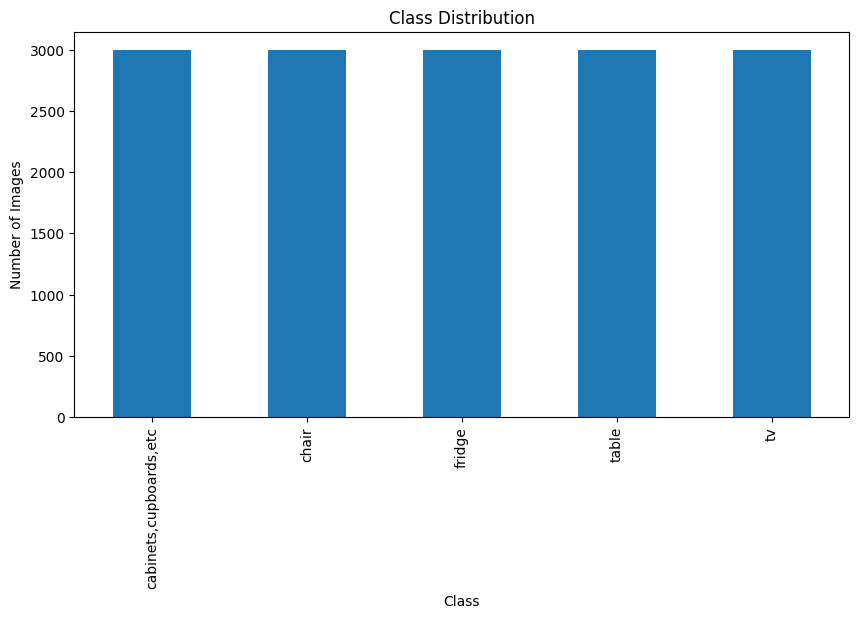


Average Image Size per Class:
                             width      height
folder                                        
cabinets,cupboards,etc  185.664667  193.003333
chair                   188.148333  198.754000
fridge                  181.877000  203.180333
table                   209.540667  189.271667
tv                      234.001667  185.747333


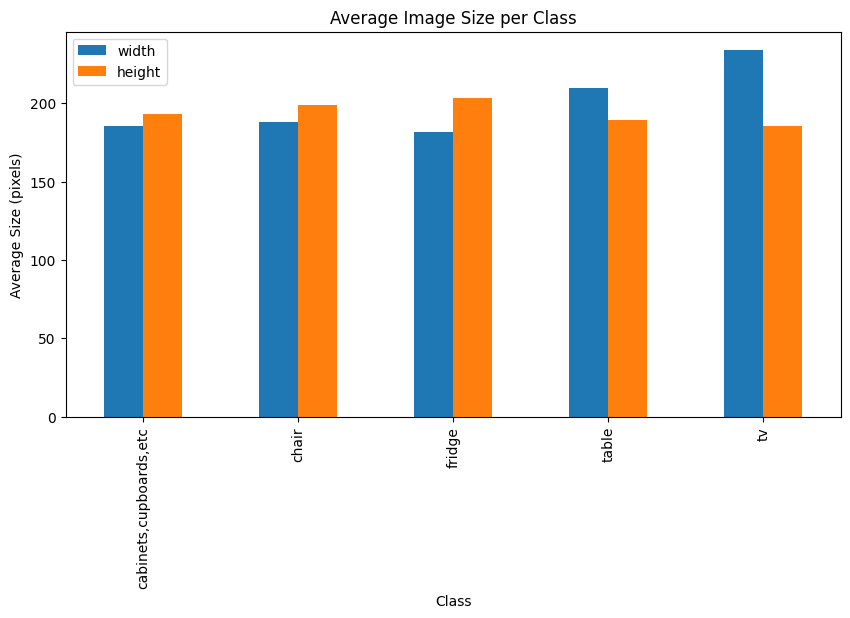


Missing or Corrupted Files:
Empty DataFrame
Columns: [folder, file_name, file_path, width, height, format, mode, size]
Index: []

Image Sizes Summary Statistics:
              width        height
count  15000.000000  15000.000000
mean     199.846467    193.991333
std       45.251762     12.307359
min       99.000000    151.000000
25%      173.000000    182.000000
50%      194.000000    192.000000
75%      218.000000    204.000000
max      348.000000    220.000000


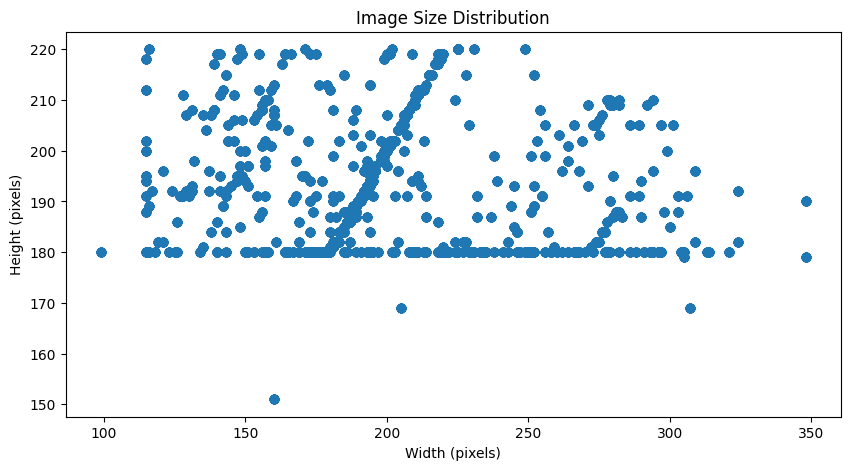

In [ ]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt


base_path = "Furniture"

folders = ["cabinets,cupboards,etc", "chair", "fridge", "table", "tv"]

metadata = []

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    if os.path.exists(folder_path):
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        width, height = img.size
                        metadata.append({
                            'folder': folder,
                            'file_name': file,
                            'file_path': file_path,
                            'width': width,
                            'height': height,
                            'format': img.format,
                            'mode': img.mode,
                            'size': os.path.getsize(file_path)
                        })
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")
    else:
        print(f"Folder does not exist: {folder_path}")

df = pd.DataFrame(metadata)

print("Summary Statistics:")
print(df.describe())

class_distribution = df['folder'].value_counts()
print("\nClass Distribution:")
print(class_distribution)

plt.figure(figsize=(10, 5))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

avg_size_per_class = df.groupby('folder')[['width', 'height']].mean()
print("\nAverage Image Size per Class:")
print(avg_size_per_class)

avg_size_per_class.plot(kind='bar', figsize=(10, 5))
plt.title('Average Image Size per Class')
plt.xlabel('Class')
plt.ylabel('Average Size (pixels)')
plt.show()

missing_or_corrupted = df[df.isnull().any(axis=1)]
print("\nMissing or Corrupted Files:")
print(missing_or_corrupted)

image_sizes = df[['width', 'height']].describe()
print("\nImage Sizes Summary Statistics:")
print(image_sizes)

plt.figure(figsize=(10, 5))
plt.scatter(df['width'], df['height'])
plt.title('Image Size Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.show()

Accessing folder: Furniture/cabinets,cupboards,etc
Accessing folder: Furniture/chair
Accessing folder: Furniture/fridge
Accessing folder: Furniture/table
Accessing folder: Furniture/tv

Total images: 15000
Average image size: (199, 193)
Max image size: (348, 190)
Min image size: (99, 180)


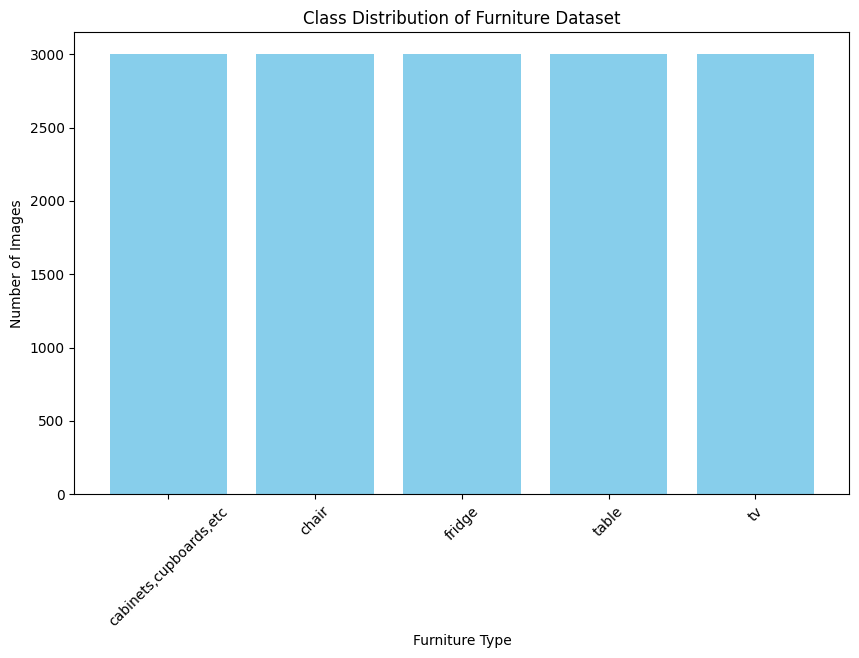

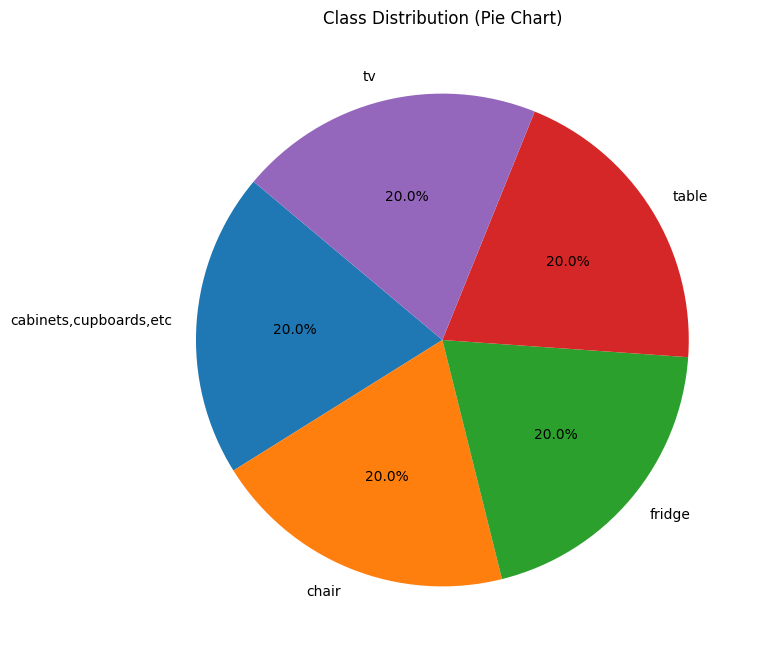

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict
from PIL import Image

base_path = "Furniture"
folders = ["cabinets,cupboards,etc", "chair", "fridge", "table", "tv"]

class_counts = defaultdict(int)
image_sizes = []

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    if os.path.exists(folder_path):
        print(f"Accessing folder: {folder_path}")
        items = os.listdir(folder_path)
        class_counts[folder] = len(items)  
        for item in items:
            item_path = os.path.join(folder_path, item)
            try:
                with Image.open(item_path) as img:
                    image_sizes.append(img.size)  
            except Exception as e:
                print(f"Error opening image {item_path}: {e}")
    else:
        print(f"Folder does not exist: {folder_path}")

total_images = sum(class_counts.values())
average_size = tuple(map(lambda x: sum(x) // len(x), zip(*image_sizes))) if image_sizes else (0, 0)
max_size = max(image_sizes, default=(0, 0))
min_size = min(image_sizes, default=(0, 0))

print(f"\nTotal images: {total_images}")
print(f"Average image size: {average_size}")
print(f"Max image size: {max_size}")
print(f"Min image size: {min_size}")

labels = class_counts.keys()
counts = class_counts.values()

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.title('Class Distribution of Furniture Dataset')
plt.xlabel('Furniture Type')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution (Pie Chart)')
plt.show()


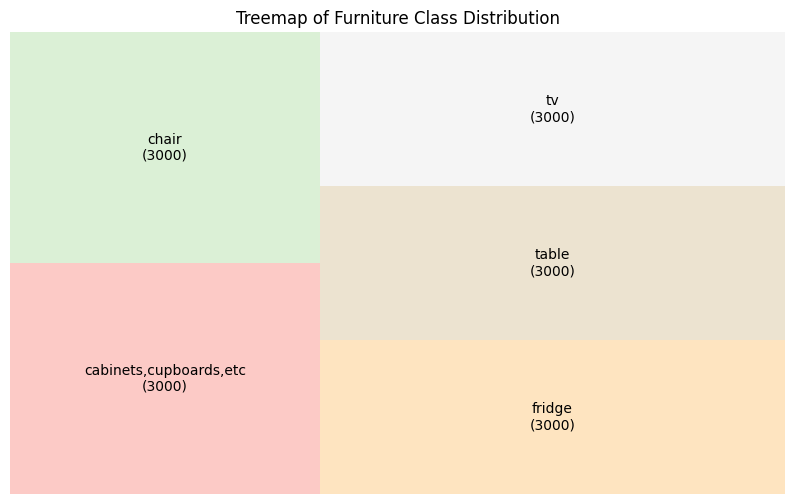

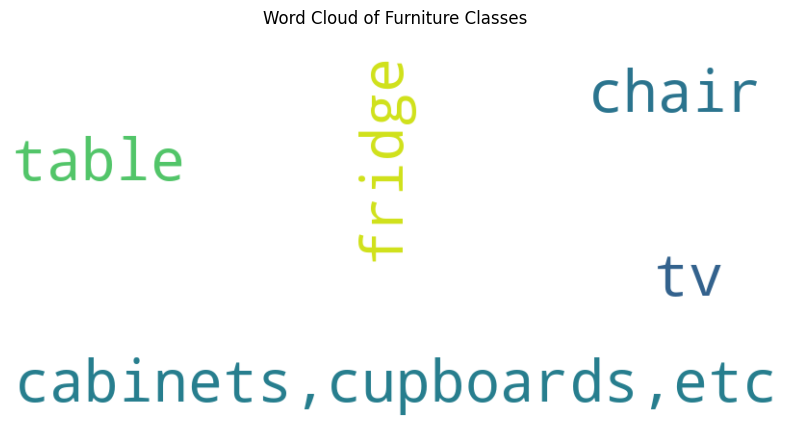

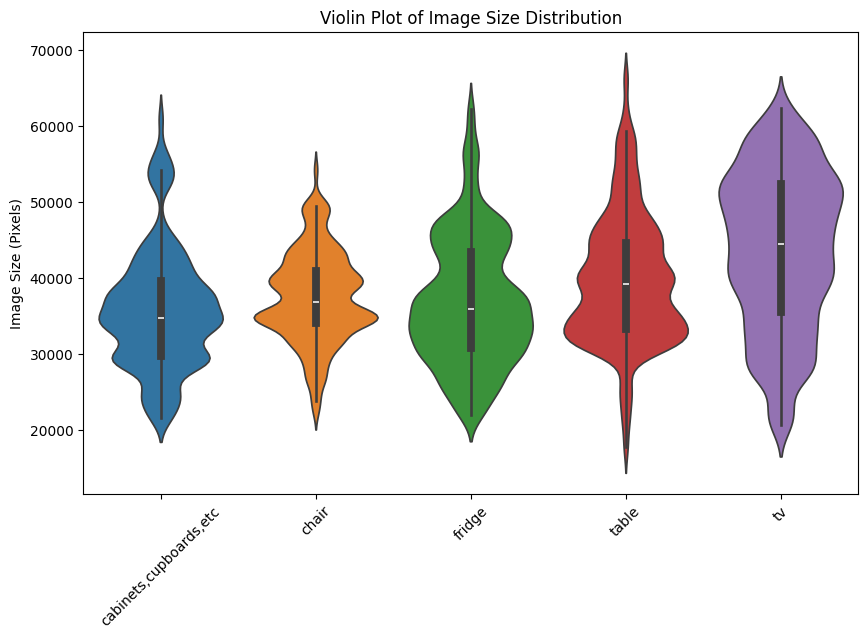

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict
from PIL import Image
from wordcloud import WordCloud
import squarify

base_path = "Furniture"
folders = ["cabinets,cupboards,etc", "chair", "fridge", "table", "tv"]

class_counts = defaultdict(int)
image_sizes = []


for folder in folders:
    folder_path = os.path.join(base_path, folder)
    if os.path.exists(folder_path):
        items = os.listdir(folder_path)
        class_counts[folder] = len(items) 
        for item in items:
            item_path = os.path.join(folder_path, item)
            try:
                with Image.open(item_path) as img:
                    image_sizes.append((folder, img.size[0] * img.size[1])) 
            except Exception:
                pass

image_size_dict = defaultdict(list)
for category, size in image_sizes:
    image_size_dict[category].append(size)

plt.figure(figsize=(10, 6))
sizes = list(class_counts.values())
labels = [f"{k}\n({v})" for k, v in class_counts.items()]
colors = plt.cm.Pastel1(np.linspace(0, 1, len(sizes)))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7)
plt.title("Treemap of Furniture Class Distribution")
plt.axis("off")
plt.show()

word_freq = {k: v for k, v in class_counts.items()}
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Furniture Classes")
plt.show()

plt.figure(figsize=(10, 6))
data = [image_size_dict[cat] for cat in folders if cat in image_size_dict]
sns.violinplot(data=data)
plt.xticks(ticks=range(len(folders)), labels=[cat for cat in folders if cat in image_size_dict], rotation=45)
plt.ylabel("Image Size (Pixels)")
plt.title("Violin Plot of Image Size Distribution")
plt.show()


In [41]:
file_list = os.listdir(dataset_path)

image_count = len([f for f in file_list if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

file_extensions = set([f.split('.')[-1] for f in file_list])

print(f"Total Images: {image_count}")
print(f"File Formats: {file_extensions}")


Total Images: 3000
File Formats: {'jpeg'}


In [42]:
metadata = []

for file in file_list:
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        file_path = os.path.join(dataset_path, file)
        try:
            with Image.open(file_path) as img:
                width, height = img.size
                metadata.append({"filename": file, "width": width, "height": height, "format": img.format})
        except Exception as e:
            print(f"Corrupted file: {file} - {e}")


df = pd.DataFrame(metadata)
print(df.head())


print(df.describe())


          filename  width  height format
0  image_2341.jpeg    139     208   JPEG
1   image_947.jpeg    208     208   JPEG
2  image_1994.jpeg    282     188   JPEG
3  image_2711.jpeg    186     186   JPEG
4  image_1097.jpeg    188     188   JPEG
             width       height
count  3000.000000  3000.000000
mean    185.664667   193.003333
std      40.326447    10.007832
min     115.000000   180.000000
25%     157.000000   186.000000
50%     186.000000   193.000000
75%     204.000000   202.000000
max     309.000000   212.000000


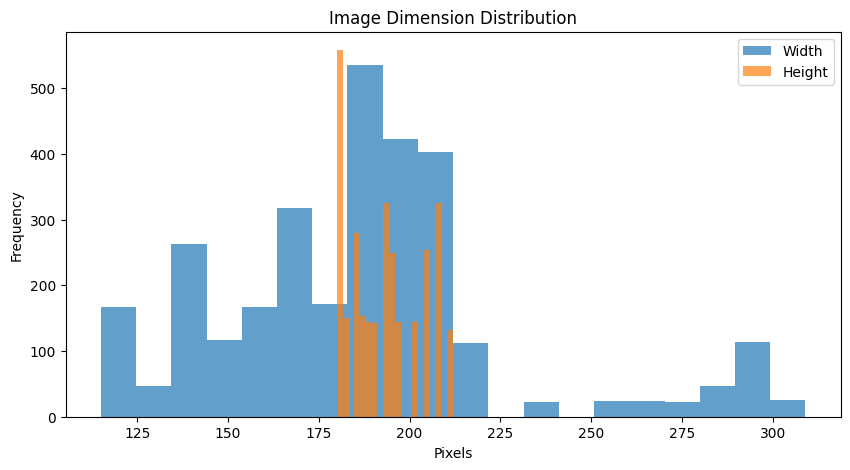

In [43]:
plt.figure(figsize=(10,5))
plt.hist(df["width"], bins=20, alpha=0.7, label="Width")
plt.hist(df["height"], bins=20, alpha=0.7, label="Height")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.title("Image Dimension Distribution")
plt.legend()
plt.show()


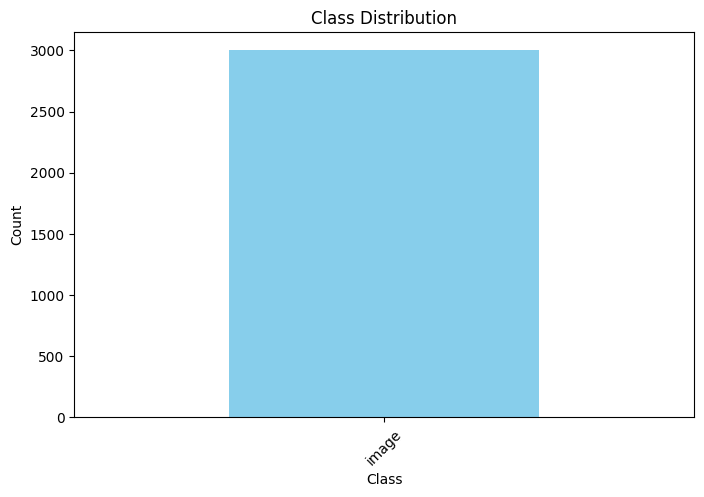

In [44]:
df["category"] = df["filename"].apply(lambda x: x.split("_")[0])  # Extract class from filename
class_counts = df["category"].value_counts()


plt.figure(figsize=(8,5))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()


In [45]:
expected_classes = ["bed", "table", "couch", "coffeetable", "dresser", "toilet", "chair", "mfurniture", "bookcase", "cabinet", "image", "lamp", "nstand"] 
missing_classes = [cls for cls in expected_classes if cls not in class_counts.index]

print(f"Missing Classes: {missing_classes}")


Missing Classes: ['bed', 'table', 'couch', 'coffeetable', 'dresser', 'toilet', 'chair', 'mfurniture', 'bookcase', 'cabinet', 'lamp', 'nstand']


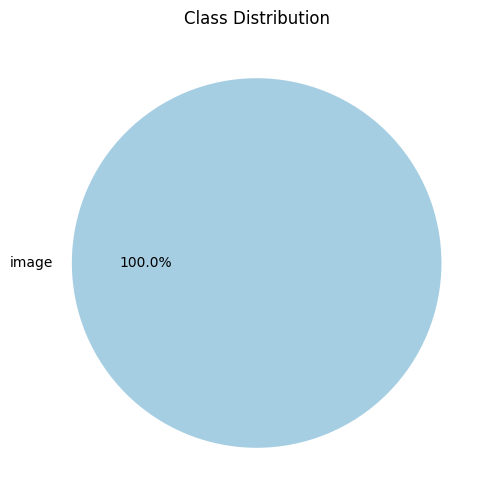

In [ ]:
plt.figure(figsize=(6,6))
class_counts.plot.pie(autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Class Distribution")
plt.ylabel("")  
plt.show()


In [47]:
import os

train_dir = "Furniture Data"
val_dir = "Furniture Data"

train_items = os.listdir(train_dir)
val_items = os.listdir(val_dir)

print(f"Number of training images: {len(train_items)}")
print(f"Number of validation images: {len(val_items)}")

train_formats = set([file.split(".")[-1] for file in train_items])
val_formats = set([file.split(".")[-1] for file in val_items])

print(f"Training set file formats: {train_formats}")
print(f"Validation set file formats: {val_formats}")


Number of training images: 193
Number of validation images: 193
Training set file formats: {'jpg'}
Validation set file formats: {'jpg'}


In [48]:
from PIL import Image
import numpy as np

def get_image_metadata(image_path):
    try:
        with Image.open(image_path) as img:
            return {
                "filename": os.path.basename(image_path),
                "format": img.format,
                "size": img.size, 
                "mode": img.mode  
            }
    except Exception as e:
        print(f"Error opening {image_path}: {e}")
        return None

val_metadata = [get_image_metadata(os.path.join(val_dir, img)) for img in val_items]
val_metadata = [data for data in val_metadata if data is not None]  

print(val_metadata[:5])


[{'filename': 'nstand_9.jpg', 'format': 'JPEG', 'size': (3000, 4495), 'mode': 'RGB'}, {'filename': 'lamp_7.jpg', 'format': 'JPEG', 'size': (3000, 4495), 'mode': 'RGB'}, {'filename': 'image_15.jpg', 'format': 'JPEG', 'size': (3000, 4506), 'mode': 'RGB'}, {'filename': 'cabinet_8.jpg', 'format': 'JPEG', 'size': (3000, 4000), 'mode': 'RGB'}, {'filename': 'cabinet_9.jpg', 'format': 'JPEG', 'size': (3000, 4175), 'mode': 'RGB'}]


In [ ]:
from collections import Counter

image_sizes = [img["size"] for img in val_metadata]
widths, heights = zip(*image_sizes)

print(f"Average width: {np.mean(widths):.2f}")
print(f"Average height: {np.mean(heights):.2f}")

size_counts = Counter(image_sizes)
print(f"Most common image sizes: {size_counts.most_common(5)}")


Average width: 3000.00
Average height: 3368.90
Most common image sizes: [((3000, 4500), 44), ((3000, 2000), 42), ((3000, 4000), 18), ((3000, 2250), 9), ((3000, 3000), 6)]


In [ ]:

small_images = df[(df["width"] < 100) | (df["height"] < 100)]
large_images = df[(df["width"] > 2000) | (df["height"] > 2000)]

print(f"Small Images: {len(small_images)}")
print(f"Large Images: {len(large_images)}")


Small Images: 0
Large Images: 0
